In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("kanye_west_lyrics.csv")

In [3]:
pd.options.display.max_colwidth = 200
df.head()

,album,song,lyric,year
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear...",2004
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands u...,2004
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won’...",2004
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down. . I'm telling you ohh, it all falls down. . Man I promise, she's so self conscious. . She has no idea what she's doing in college. . That major that ...",2004
4,College Dropout,I'll Fly Away,". . . . Some glad morning when this life is over,. . I'll fly away.. . To a home on God's celestial shore,. . I'll fly away.. . I'll fly away, O Glory,. . I'll fly away.. . When I die, Hallelujah,...",2004


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
stop_words=stopwords.words("english")

In [7]:
stop_words.extend(['niggas','nigga','fuck','shit','back','come','things','get','uh','la','ya','oh','yeah','place','bitch','would','like','know','stay','go','let','cause'])

In [8]:
vectorizer = TfidfVectorizer(stop_words = stop_words , min_df= 0.01)

In [9]:
tfidf = vectorizer.fit_transform(df['lyric'])

In [10]:
from sklearn.decomposition import NMF

In [11]:
nmf = NMF(n_components = 6)

In [12]:
topic_values = nmf.fit_transform(tfidf)

In [13]:
for topic_num, topic in enumerate(nmf.components_): 
    message = "Topic #{}: ".format(topic_num + 1) 
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: right got see need one man never god tell make
Topic #2: goodbye love winter coldest friend away memories ever made 4am
Topic #3: broke phi got afford gas cars brother kanye none ago
Topic #4: hey college classes secretary degree money smart extra level school
Topic #5: lights america night survive flashing baby want mind life world
Topic #6: forever ever diamonds could chain sayin leone conflict sierra connect


In [14]:
topic_labels = ['God','Love','Money','College','Partying','Social Issues']

In [15]:
df_topics = pd.DataFrame(topic_values,columns= topic_labels)
df_topics

,God,Love,Money,College,Partying,Social Issues
0,0.056977,0.033457,0.030957,0.010090,0.000000,0.030176
1,0.142697,0.000000,0.018294,0.133642,0.000000,0.045254
2,0.110942,0.000000,0.014484,0.012110,0.000000,0.000000
3,0.136161,0.000000,0.016588,0.048229,0.000000,0.023474
4,0.015979,0.186326,0.000000,0.000000,0.000000,0.014855
5,0.168478,0.060454,0.000000,0.014602,0.000000,0.030924
6,0.121964,0.002050,0.000000,0.028948,0.000000,0.008796
7,0.218087,0.005436,0.001117,0.000000,0.000000,0.020672
8,0.212926,0.007434,0.013917,0.019182,0.000000,0.000000
9,0.100735,0.005445,0.020275,0.016407,0.000000,0.000000


In [16]:
df = df.join(df_topics)
df.head()

,album,song,lyric,year,God,Love,Money,College,Partying,Social Issues
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear...",2004,0.056977,0.033457,0.030957,0.010090,0.0,0.030176
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands u...,2004,0.142697,0.000000,0.018294,0.133642,0.0,0.045254
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won’...",2004,0.110942,0.000000,0.014484,0.012110,0.0,0.000000
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down. . I'm telling you ohh, it all falls down. . Man I promise, she's so self conscious. . She has no idea what she's doing in college. . That major that ...",2004,0.136161,0.000000,0.016588,0.048229,0.0,0.023474
4,College Dropout,I'll Fly Away,". . . . Some glad morning when this life is over,. . I'll fly away.. . To a home on God's celestial shore,. . I'll fly away.. . I'll fly away, O Glory,. . I'll fly away.. . When I die, Hallelujah,...",2004,0.015979,0.186326,0.000000,0.000000,0.0,0.014855


In [17]:
for label in topic_labels: 
    df.loc[df[label] >= .1, label] = 1 
    df.loc[df[label] < .1, label] = 0

In [18]:
df.head()

,album,song,lyric,year,God,Love,Money,College,Partying,Social Issues
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear...",2004,0.0,0.0,0.0,0.0,0.0,0.0
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands u...,2004,1.0,0.0,0.0,1.0,0.0,0.0
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won’...",2004,1.0,0.0,0.0,0.0,0.0,0.0
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down. . I'm telling you ohh, it all falls down. . Man I promise, she's so self conscious. . She has no idea what she's doing in college. . That major that ...",2004,1.0,0.0,0.0,0.0,0.0,0.0
4,College Dropout,I'll Fly Away,". . . . Some glad morning when this life is over,. . I'll fly away.. . To a home on God's celestial shore,. . I'll fly away.. . I'll fly away, O Glory,. . I'll fly away.. . When I die, Hallelujah,...",2004,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
year_topics = df.groupby('year').sum().reset_index()

In [20]:
year_topics

,year,God,Love,Money,College,Partying,Social Issues
0,2004,14.0,1.0,0.0,5.0,0.0,0.0
1,2005,11.0,0.0,5.0,1.0,1.0,4.0
2,2007,10.0,2.0,0.0,1.0,2.0,0.0
3,2008,6.0,3.0,0.0,1.0,1.0,0.0
4,2010,9.0,0.0,0.0,1.0,4.0,1.0
5,2011,14.0,1.0,0.0,0.0,1.0,0.0
6,2012,8.0,1.0,0.0,0.0,0.0,0.0
7,2013,7.0,0.0,0.0,0.0,0.0,0.0
8,2016,11.0,0.0,1.0,0.0,1.0,1.0


In [21]:
import matplotlib.pyplot as plt

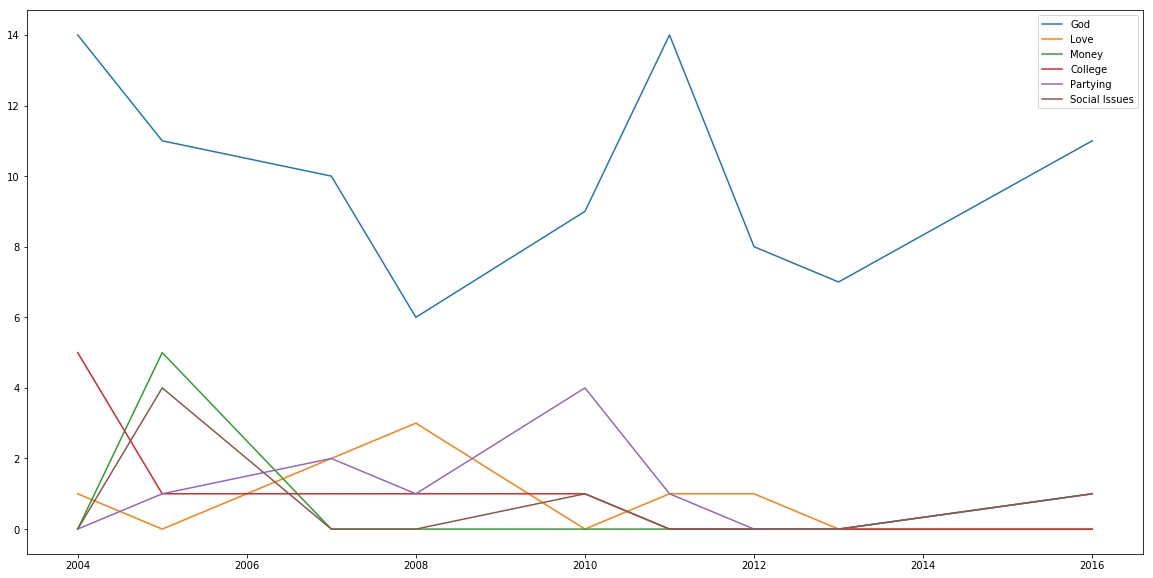

In [22]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['year'],year_topics['God'],label = 'God')
plt.plot(year_topics['year'],year_topics['Love'],label = 'Love')
plt.plot(year_topics['year'],year_topics['Money'],label = 'Money')
plt.plot(year_topics['year'],year_topics['College'],label = 'College')
plt.plot(year_topics['year'],year_topics['Partying'],label = 'Partying')
plt.plot(year_topics['year'],year_topics['Social Issues'],label = 'Social Issues')
plt.legend()